In [24]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
ra = pd.read_csv(r'/content/food prices.csv')
#print (df)
ra.describe()

,price,adm1id,mktid,cmid,ptid,umid,catid,default
count,7662.000000,7662.000000,7662.000000,7662.000000,7662.0,7662.000000,7662.000000,0.0
mean,106.919688,2275.241321,292.975333,140.657270,15.0,9.745236,3.488906,NaN
std,124.318398,1.692555,1.404504,107.135975,0.0,10.767328,2.724781,NaN
min,9.000000,2272.000000,291.000000,58.000000,15.0,5.000000,1.000000,NaN
25%,36.922500,2275.000000,292.000000,61.000000,15.0,5.000000,1.000000,NaN
50%,72.730000,2276.000000,293.000000,97.000000,15.0,5.000000,2.000000,NaN
75%,138.397500,2276.000000,294.000000,138.000000,15.0,5.000000,6.000000,NaN
max,997.000000,2277.000000,295.000000,465.000000,15.0,51.000000,8.000000,NaN


In [25]:
ra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      7662 non-null   object 
 1   cmname    7662 non-null   object 
 2   unit      7662 non-null   object 
 3   category  7662 non-null   object 
 4   price     7662 non-null   float64
 5   currency  7662 non-null   object 
 6   country   7662 non-null   object 
 7   admname   7662 non-null   object 
 8   adm1id    7662 non-null   int64  
 9   mktname   7662 non-null   object 
 10  mktid     7662 non-null   int64  
 11  cmid      7662 non-null   int64  
 12  ptid      7662 non-null   int64  
 13  umid      7662 non-null   int64  
 14  catid     7662 non-null   int64  
 15  sn        7662 non-null   object 
 16  default   0 non-null      float64
dtypes: float64(2), int64(6), object(9)
memory usage: 1017.7+ KB


In [26]:
ra.head(5)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,1/15/2004,Wheat flour - Retail,KG,cereals and tubers,13.00,PKR,Pakistan,Balochistan,2272,Quetta,295,58,15,5,1,295_58_15_5,NaN
1,2/15/2004,Wheat flour - Retail,KG,cereals and tubers,13.00,PKR,Pakistan,Balochistan,2272,Quetta,295,58,15,5,1,295_58_15_5,NaN
2,3/15/2004,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295,58,15,5,1,295_58_15_5,NaN
3,4/15/2004,Wheat flour - Retail,KG,cereals and tubers,12.50,PKR,Pakistan,Balochistan,2272,Quetta,295,58,15,5,1,295_58_15_5,NaN
4,5/15/2004,Wheat flour - Retail,KG,cereals and tubers,13.25,PKR,Pakistan,Balochistan,2272,Quetta,295,58,15,5,1,295_58_15_5,NaN


In [7]:
ra.isnull().any()

date        False
cmname      False
unit        False
category    False
price       False
currency    False
country     False
admname     False
adm1id      False
mktname     False
mktid        True
cmid        False
ptid         True
umid         True
catid       False
sn          False
default      True
dtype: bool

In [27]:
#adding the missing value 
ra['mktid'] = ra['mktid'].fillna(ra['mktid'].mode()[0])
ra['ptid'] = ra['ptid'].fillna(ra['ptid'].mode()[0])
ra['umid'] = ra['umid'].fillna(ra['umid'].mode()[0])
ra.isnull().any()

date        False
cmname      False
unit        False
category    False
price       False
currency    False
country     False
admname     False
adm1id      False
mktname     False
mktid       False
cmid        False
ptid        False
umid        False
catid       False
sn          False
default      True
dtype: bool

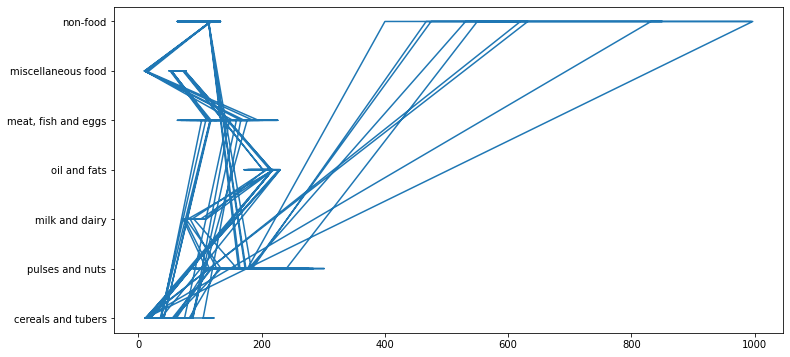

In [28]:
plt.figure(figsize=(12,6))
plt.plot(ra["price"], ra["category"])

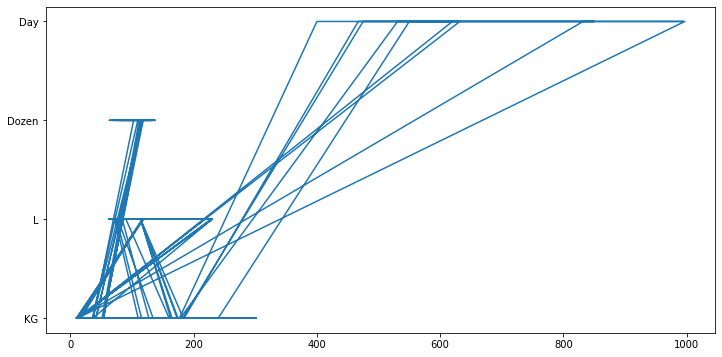

In [29]:
plt.figure(figsize=(12,6))
plt.plot(ra["price"], ra["unit"])

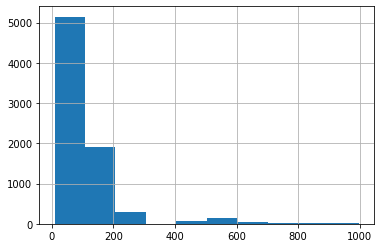

In [31]:
ra['price'].hist()

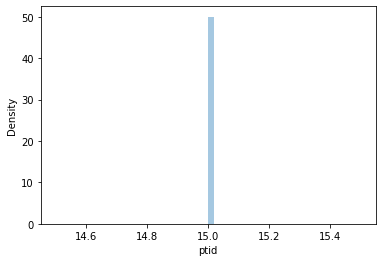

In [34]:
sns.distplot(ra['ptid'])

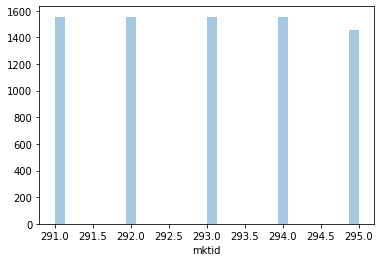

In [35]:
sns.distplot(ra['mktid'],kde=False,bins=30)

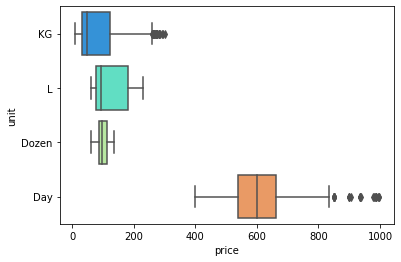

In [36]:
sns.boxplot(x="price", y="unit", data=ra,palette='rainbow')

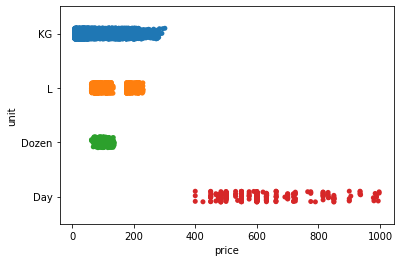

In [37]:
sns.stripplot(x="price", y="unit", data=ra,jitter=True)

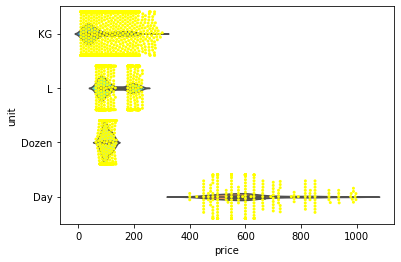

In [39]:
sns.violinplot(x="price", y="unit", data=ra,palette='rainbow')
sns.swarmplot(x="price", y="unit", data=ra,color='yellow',size=3)

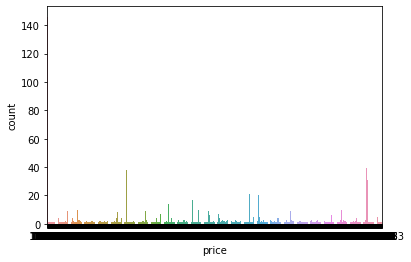

In [40]:
sns.countplot(x='price',data=ra)
plt.xlabel("price")
plt.show()

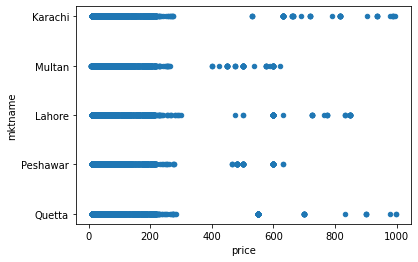

In [47]:
ra.plot(kind='scatter',x='price',y='mktname')

In [50]:

w = ['price']
X = ra[w]
y = ra['adm1id']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




# applying the machine learning model Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy found on training set: {:.2f}'
     .format(c
             lf.score(X_train, y_train)))
print('Accuracy found by applying the decision tree model on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy found on training set: 0.79
Accuracy found by applying the decision tree model on test set: 0.53


In [53]:
# eadaboost this is the machine learning algorithm for training the data and to find out the accuracy from training the dataset 
#
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# here the dataset is classified 
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# first step is to define the data model
model = AdaBoostClassifier()
# for evaluating the model to get the useful information 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# finding out the and printing out the accuracy from trained data 
print('Accuracy by using eadaboost algorithm: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy by using eadaboost algorithm: 0.806 (0.041)


In [55]:
#applying the svm model to trained dataset model on training set and on test set  

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print(' training set svm accuracy by applying the classifying data: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('test set accuracy by classying the data: {:.2f}'
     .format(svm.score(X_test, y_test)))

 training set svm accuracy by applying the classifying data: 0.42
test set accuracy by classying the data: 0.41


In [56]:
#question #8       making the confusioConfussion Matrix pf actual data and the predicted data 
data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

ra= pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (ra)

    y_Actual  y_Predicted
0          1            1
1          0            1
2          0            0
3          1            1
4          0            0
5          1            1
6          0            1
7          0            0
8          1            1
9          0            0
10         1            0
11         0            0
